In [1]:
pip install alpha_vantage pandas


Note: you may need to restart the kernel to use updated packages.


In [28]:
from alpha_vantage.timeseries import TimeSeries


from pprint import pprint

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt 
import sys
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math
from sklearn.metrics import r2_score
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import time
from tensorflow import keras
import numpy as np
from matplotlib import pyplot






In [35]:
# Obtaining stock data from alpha vantage 
sym='VOO'


# funtion to obtain data from alpha vantage API
def stock_data(sym, date_of_data):
    
    ts = TimeSeries(key='SUXOFAIGXM6HEP9Y', output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=sym, outputsize='full')
    data_date_changed = data[:date_of_data]
    data_date_changed['Ticker']= sym
    data_date_changed.sort_index(ascending=True, inplace=True)
    return data_date_changed

In [36]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['date'], y = df[i], name = i)
  fig.show()

In [37]:
data_dated= stock_data(sym,'2015-01-01')

In [38]:
data_dated.head(10)

1. open  2. high   3. low  4. close  5. adjusted close  6. volume  \
date                                                                            
2015-01-02   189.29  189.720  187.260    188.40         166.788126  1864986.0   
2015-01-05   187.26  187.410  184.660    185.09         163.857825  2734710.0   
2015-01-06   185.37  185.880  182.355    183.27         162.246602  2245265.0   
2015-01-07   184.73  185.910  184.230    185.56         164.273910  2305552.0   
2015-01-08   187.13  189.051  187.070    188.82         167.159946  1740140.0   
2015-01-09   189.30  189.340  186.650    187.23         165.752339  2525211.0   
2015-01-12   187.46  187.600  185.190    185.84         164.521790  1847548.0   
2015-01-13   187.22  188.410  183.900    185.35         164.087999  2158515.0   
2015-01-14   183.10  184.399  182.110    184.26         163.123036  5216290.0   
2015-01-15   184.88  185.250  182.400    182.54         161.600342  1940682.0   

            7. dividend amount  8. split coefficient Ticker  
date                                                         
2015-01-02                 0.0                   1.0    VOO  
2015-01-05                 0.0                   1.0    VOO  
2015-01-06                 0.0                   1.0    VOO  
2015-01-07                 0.0                   1.0    VOO  
2015-01-08                 0.0                   1.0    VOO  
2015-01-09                 0.0                   1.0    VOO  
2015-01-12                 0.0                   1.0    VOO  
2015-01-13                 0.0                   1.0    VOO  
2015-01-14                 0.0                   1.0    VOO  
2015-01-15                 0.0                   1.0    VOO

In [39]:
# Check if Null values exist in stock prices data
data_dated.isnull().sum()

1. open                 0
2. high                 0
3. low                  0
4. close                0
5. adjusted close       0
6. volume               0
7. dividend amount      0
8. split coefficient    0
Ticker                  0
dtype: int64

In [40]:
# Get stock prices dataframe info
data_dated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1578 entries, 2015-01-02 to 2021-04-09
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               1578 non-null   float64
 1   2. high               1578 non-null   float64
 2   3. low                1578 non-null   float64
 3   4. close              1578 non-null   float64
 4   5. adjusted close     1578 non-null   float64
 5   6. volume             1578 non-null   float64
 6   7. dividend amount    1578 non-null   float64
 7   8. split coefficient  1578 non-null   float64
 8   Ticker                1578 non-null   object 
dtypes: float64(8), object(1)
memory usage: 123.3+ KB


In [41]:
data_dated.describe()

1. open      2. high       3. low     4. close  5. adjusted close  \
count  1578.000000  1578.000000  1578.000000  1578.000000        1578.000000   
mean    241.885698   243.075592   240.540039   241.903227         229.303919   
std      47.334022    47.610201    47.018321    47.330440          52.801434   
min     167.260000   168.720000   165.960000   167.700000         151.597525   
25%     195.560000   196.525000   194.990900   195.705000         179.500844   
50%     241.745000   243.549950   239.480000   242.015000         228.933214   
75%     268.340000   269.547500   267.245000   268.550000         259.881700   
max     375.420000   378.400000   375.330000   378.250000         378.250000   

          6. volume  7. dividend amount  8. split coefficient  
count  1.578000e+03         1578.000000                1578.0  
mean   2.888712e+06            0.018574                   1.0  
std    2.132930e+06            0.148089                   0.0  
min    5.890090e+05            0.000000                   1.0  
25%    1.705844e+06            0.000000                   1.0  
50%    2.352320e+06            0.000000                   1.0  
75%    3.299338e+06            0.000000                   1.0  
max    2.455255e+07            1.455100                   1.0

Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

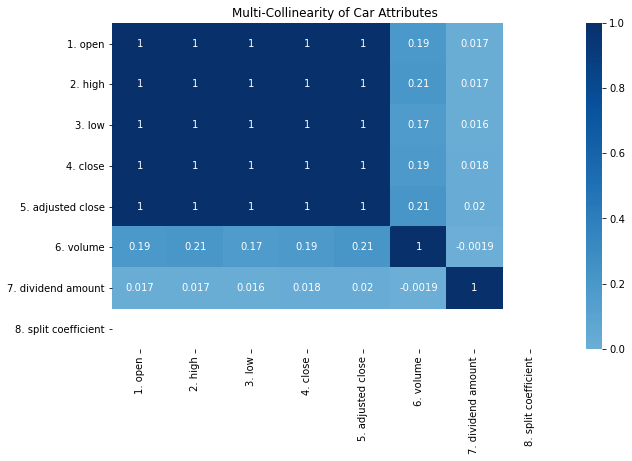

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data_dated.corr(), center=0, cmap='Blues' , annot=True)
ax.set_title('Multi-Collinearity of Car Attributes')

In [43]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data,days):
  
  # 1 day window 
#   n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['4. close']].shift(-days)
  
  # return the new dataset 
  return data

In [44]:
df=data_dated.copy()

In [45]:
# calculate the change in price from the previous day
data_dated['change_in_price'] = data_dated['4. close'].diff()

In [46]:
data_dated

1. open   2. high   3. low  4. close  5. adjusted close  \
date                                                                  
2015-01-02   189.29  189.7200  187.260    188.40         166.788126   
2015-01-05   187.26  187.4100  184.660    185.09         163.857825   
2015-01-06   185.37  185.8800  182.355    183.27         162.246602   
2015-01-07   184.73  185.9100  184.230    185.56         164.273910   
2015-01-08   187.13  189.0510  187.070    188.82         167.159946   
...             ...       ...      ...       ...                ...   
2021-04-05   370.89  374.0700  370.810    373.47         373.470000   
2021-04-06   373.04  374.3300  372.670    373.26         373.260000   
2021-04-07   373.14  374.0797  372.720    373.73         373.730000   
2021-04-08   374.97  375.5600  374.060    375.55         375.550000   
2021-04-09   375.42  378.4000  375.330    378.25         378.250000   

            6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                     
2015-01-02  1864986.0                 0.0                   1.0    VOO   
2015-01-05  2734710.0                 0.0                   1.0    VOO   
2015-01-06  2245265.0                 0.0                   1.0    VOO   
2015-01-07  2305552.0                 0.0                   1.0    VOO   
2015-01-08  1740140.0                 0.0                   1.0    VOO   
...               ...                 ...                   ...    ...   
2021-04-05  3764095.0                 0.0                   1.0    VOO   
2021-04-06  3583491.0                 0.0                   1.0    VOO   
2021-04-07  2768895.0                 0.0                   1.0    VOO   
2021-04-08  3949423.0                 0.0                   1.0    VOO   
2021-04-09  2627530.0                 0.0                   1.0    VOO   

            change_in_price  
date                         
2015-01-02              NaN  
2015-01-05            -3.31  
2015-01-06            -1.82  
2015-01-07             2.29  
2015-01-08             3.26  
...                     ...  
2021-04-05             5.31  
2021-04-06            -0.21  
2021-04-07             0.47  
2021-04-08             1.82  
2021-04-09             2.70  

[1578 rows x 10 columns]

In [47]:
# calculating the Relative Strength Index

def calc_RSI(data_dated):
    # Calculate the 14 day RSI
    n = 14

    # First make a copy of the data frame twice
    up_df, down_df = data_dated[['Ticker','change_in_price']].copy(), data_dated[['Ticker','change_in_price']].copy()

    # For up days, if the change is less than 0 set to 0.
    up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0

    # For down days, if the change is greater than 0 set to 0.
    down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0

    # We need change in price to be absolute.
    down_df['change_in_price'] = down_df['change_in_price'].abs()

    # Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
    ewma_up = up_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
    ewma_down = down_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

    # Calculate the Relative Strength
    relative_strength = ewma_up / ewma_down

    # Calculate the Relative Strength Index
    relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

    # Add the info to the data frame.
    data_dated['down_days'] = down_df['change_in_price']
    data_dated['up_days'] = up_df['change_in_price']
    data_dated['RSI'] = relative_strength_index

calc_RSI(data_dated)
# Display the head.
data_dated.head(30)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2015-01-02   189.29  189.7200  187.2600  188.4000         166.788126   
2015-01-05   187.26  187.4100  184.6600  185.0900         163.857825   
2015-01-06   185.37  185.8800  182.3550  183.2700         162.246602   
2015-01-07   184.73  185.9100  184.2300  185.5600         164.273910   
2015-01-08   187.13  189.0510  187.0700  188.8200         167.159946   
2015-01-09   189.30  189.3400  186.6500  187.2300         165.752339   
2015-01-12   187.46  187.6000  185.1900  185.8400         164.521790   
2015-01-13   187.22  188.4100  183.9000  185.3500         164.087999   
2015-01-14   183.10  184.3990  182.1100  184.2600         163.123036   
2015-01-15   184.88  185.2500  182.4000  182.5400         161.600342   
2015-01-16   182.31  185.0800  182.0868  184.8000         163.601091   
2015-01-20   185.62  185.9000  183.5800  185.2600         164.008323   
2015-01-21   184.77  186.7400  184.3000  186.2300         164.867052   
2015-01-22   187.09  189.1500  185.5966  189.0800         167.390121   
2015-01-23   188.72  189.0200  187.7900  188.0400         166.469422   
2015-01-26   187.79  188.5100  186.9330  188.4100         166.796978   
2015-01-27   186.14  187.1800  185.0200  185.9401         164.610407   
2015-01-28   187.27  187.3200  183.3500  183.4900         162.441365   
2015-01-29   183.74  185.5299  182.2100  185.2700         164.017176   
2015-01-30   183.96  185.3799  182.6300  182.9900         161.998721   
2015-02-02   183.50  185.2600  181.4700  185.0900         163.857825   
2015-02-03   186.13  187.8600  185.7900  187.7900         166.248100   
2015-02-04   187.03  188.3500  186.6500  187.1500         165.681516   
2015-02-05   187.89  189.1900  187.8500  189.0500         167.363562   
2015-02-06   189.49  190.0500  187.9400  188.5200         166.894360   
2015-02-09   187.81  188.5900  187.2200  187.6600         166.133013   
2015-02-10   188.82  189.9300  187.8460  189.6600         167.903587   
2015-02-11   189.51  190.2300  188.7800  189.7900         168.018675   
2015-02-12   190.70  191.6500  190.4700  191.5500         169.576780   
2015-02-13   191.72  192.4400  191.4600  192.3900         170.320422   

            6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                     
2015-01-02  1864986.0                 0.0                   1.0    VOO   
2015-01-05  2734710.0                 0.0                   1.0    VOO   
2015-01-06  2245265.0                 0.0                   1.0    VOO   
2015-01-07  2305552.0                 0.0                   1.0    VOO   
2015-01-08  1740140.0                 0.0                   1.0    VOO   
2015-01-09  2525211.0                 0.0                   1.0    VOO   
2015-01-12  1847548.0                 0.0                   1.0    VOO   
2015-01-13  2158515.0                 0.0                   1.0    VOO   
2015-01-14  5216290.0                 0.0                   1.0    VOO   
2015-01-15  1940682.0                 0.0                   1.0    VOO   
2015-01-16  1472796.0                 0.0                   1.0    VOO   
2015-01-20  1637624.0                 0.0                   1.0    VOO   
2015-01-21  1586504.0                 0.0                   1.0    VOO   
2015-01-22  6074360.0                 0.0                   1.0    VOO   
2015-01-23  3109762.0                 0.0                   1.0    VOO   
2015-01-26  2018019.0                 0.0                   1.0    VOO   
2015-01-27  1979085.0                 0.0                   1.0    VOO   
2015-01-28  2529352.0                 0.0                   1.0    VOO   
2015-01-29  4338151.0                 0.0                   1.0    VOO   
2015-01-30  2302436.0                 0.0                   1.0    VOO   
2015-02-02  3397819.0                 0.0                   1.0    VOO   
2015-

In [48]:
# Claclulting the Stochastic Oscillator
def stochastic_Oscillator(data_dated):

    # Calculate the Stochastic Oscillator
    n = 14

    # Make a copy of the high and low column.
    low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()

    # Group by symbol, then apply the rolling function and grab the Min and Max.
    low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
    high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())

    # Calculate the Stochastic Oscillator.
    k_percent = 100 * ((data_dated['4. close'] - low_14) / (high_14 - low_14))

    # Add the info to the data frame.
    data_dated['low_14'] = low_14
    data_dated['high_14'] = high_14
    data_dated['k_percent'] = k_percent


stochastic_Oscillator(data_dated)
# Display the head.
data_dated.head(5)

1. open  2. high   3. low  4. close  5. adjusted close  6. volume  \
date                                                                            
2015-01-02   189.29  189.720  187.260    188.40         166.788126  1864986.0   
2015-01-05   187.26  187.410  184.660    185.09         163.857825  2734710.0   
2015-01-06   185.37  185.880  182.355    183.27         162.246602  2245265.0   
2015-01-07   184.73  185.910  184.230    185.56         164.273910  2305552.0   
2015-01-08   187.13  189.051  187.070    188.82         167.159946  1740140.0   

            7. dividend amount  8. split coefficient Ticker  change_in_price  \
date                                                                           
2015-01-02                 0.0                   1.0    VOO              NaN   
2015-01-05                 0.0                   1.0    VOO            -3.31   
2015-01-06                 0.0                   1.0    VOO            -1.82   
2015-01-07                 0.0                   1.0    VOO             2.29   
2015-01-08                 0.0                   1.0    VOO             3.26   

            down_days  up_days        RSI  low_14  high_14  k_percent  
date                                                                   
2015-01-02        NaN      NaN        NaN     NaN      NaN        NaN  
2015-01-05       3.31     0.00   0.000000     NaN      NaN        NaN  
2015-01-06       1.82     0.00   0.000000     NaN      NaN        NaN  
2015-01-07       0.00     2.29  36.043063     NaN      NaN        NaN  
2015-01-08       0.00     3.26  59.827077     NaN      NaN        NaN

In [49]:
# calculating williams R%
def calc_williams_r(data_dated):
# Calculate the Williams %R
    n = 14
    # Make a copy of the high and low column.
    low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()
    # Group by symbol, then apply the rolling function and grab the Min and Max.
    low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
    high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())
    # Calculate William %R indicator.
    r_percent = ((high_14 - data_dated['4. close']) / (high_14 - low_14)) * - 100
    # Add the info to the data frame.
    data_dated['r_percent'] = r_percent


calc_williams_r(data_dated)
# Display the head.
data_dated.head(5)

1. open  2. high   3. low  4. close  5. adjusted close  6. volume  \
date                                                                            
2015-01-02   189.29  189.720  187.260    188.40         166.788126  1864986.0   
2015-01-05   187.26  187.410  184.660    185.09         163.857825  2734710.0   
2015-01-06   185.37  185.880  182.355    183.27         162.246602  2245265.0   
2015-01-07   184.73  185.910  184.230    185.56         164.273910  2305552.0   
2015-01-08   187.13  189.051  187.070    188.82         167.159946  1740140.0   

            7. dividend amount  8. split coefficient Ticker  change_in_price  \
date                                                                           
2015-01-02                 0.0                   1.0    VOO              NaN   
2015-01-05                 0.0                   1.0    VOO            -3.31   
2015-01-06                 0.0                   1.0    VOO            -1.82   
2015-01-07                 0.0                   1.0    VOO             2.29   
2015-01-08                 0.0                   1.0    VOO             3.26   

            down_days  up_days        RSI  low_14  high_14  k_percent  \
date                                                                    
2015-01-02        NaN      NaN        NaN     NaN      NaN        NaN   
2015-01-05       3.31     0.00   0.000000     NaN      NaN        NaN   
2015-01-06       1.82     0.00   0.000000     NaN      NaN        NaN   
2015-01-07       0.00     2.29  36.043063     NaN      NaN        NaN   
2015-01-08       0.00     3.26  59.827077     NaN      NaN        NaN   

            r_percent  
date                   
2015-01-02        NaN  
2015-01-05        NaN  
2015-01-06        NaN  
2015-01-07        NaN  
2015-01-08        NaN

In [50]:
# calculating the Moving Average Convergence Divergnece (MACD)
def calc_macd(data_dated):
    # Calculate the MACD
    ema_26 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 26).mean())
    ema_12 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 12).mean())
    macd = ema_12 - ema_26

    # Calculate the EMA
    ema_9_macd = macd.ewm(span = 9).mean()

    # Store the data in the data frame.
    data_dated['MACD'] = macd
    data_dated['MACD_EMA'] = ema_9_macd
    

calc_macd(data_dated)   
# Print the head.
data_dated.head(5)

1. open  2. high   3. low  4. close  5. adjusted close  6. volume  \
date                                                                            
2015-01-02   189.29  189.720  187.260    188.40         166.788126  1864986.0   
2015-01-05   187.26  187.410  184.660    185.09         163.857825  2734710.0   
2015-01-06   185.37  185.880  182.355    183.27         162.246602  2245265.0   
2015-01-07   184.73  185.910  184.230    185.56         164.273910  2305552.0   
2015-01-08   187.13  189.051  187.070    188.82         167.159946  1740140.0   

            7. dividend amount  8. split coefficient Ticker  change_in_price  \
date                                                                           
2015-01-02                 0.0                   1.0    VOO              NaN   
2015-01-05                 0.0                   1.0    VOO            -3.31   
2015-01-06                 0.0                   1.0    VOO            -1.82   
2015-01-07                 0.0                   1.0    VOO             2.29   
2015-01-08                 0.0                   1.0    VOO             3.26   

            down_days  up_days        RSI  low_14  high_14  k_percent  \
date                                                                    
2015-01-02        NaN      NaN        NaN     NaN      NaN        NaN   
2015-01-05       3.31     0.00   0.000000     NaN      NaN        NaN   
2015-01-06       1.82     0.00   0.000000     NaN      NaN        NaN   
2015-01-07       0.00     2.29  36.043063     NaN      NaN        NaN   
2015-01-08       0.00     3.26  59.827077     NaN      NaN        NaN   

            r_percent      MACD  MACD_EMA  
date                                       
2015-01-02        NaN  0.000000  0.000000  
2015-01-05        NaN -0.074263 -0.041257  
2015-01-06        NaN -0.151064 -0.086260  
2015-01-07        NaN -0.099612 -0.090783  
2015-01-08        NaN  0.060165 -0.045879

In [51]:
# calculating the price rate of change 
def calc_price_rate_of_change(data_dated):
    # Calculate the Price Rate of Change
    n = 9

    # Calculate the Rate of Change in the Price, and store it in the Data Frame.
    data_dated['Price_Rate_Of_Change'] = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.pct_change(periods = n))

calc_price_rate_of_change(data_dated)
# Print the first 30 rows
data_dated.head(5)

1. open  2. high   3. low  4. close  5. adjusted close  6. volume  \
date                                                                            
2015-01-02   189.29  189.720  187.260    188.40         166.788126  1864986.0   
2015-01-05   187.26  187.410  184.660    185.09         163.857825  2734710.0   
2015-01-06   185.37  185.880  182.355    183.27         162.246602  2245265.0   
2015-01-07   184.73  185.910  184.230    185.56         164.273910  2305552.0   
2015-01-08   187.13  189.051  187.070    188.82         167.159946  1740140.0   

            7. dividend amount  8. split coefficient Ticker  change_in_price  \
date                                                                           
2015-01-02                 0.0                   1.0    VOO              NaN   
2015-01-05                 0.0                   1.0    VOO            -3.31   
2015-01-06                 0.0                   1.0    VOO            -1.82   
2015-01-07                 0.0                   1.0    VOO             2.29   
2015-01-08                 0.0                   1.0    VOO             3.26   

            down_days  up_days        RSI  low_14  high_14  k_percent  \
date                                                                    
2015-01-02        NaN      NaN        NaN     NaN      NaN        NaN   
2015-01-05       3.31     0.00   0.000000     NaN      NaN        NaN   
2015-01-06       1.82     0.00   0.000000     NaN      NaN        NaN   
2015-01-07       0.00     2.29  36.043063     NaN      NaN        NaN   
2015-01-08       0.00     3.26  59.827077     NaN      NaN        NaN   

            r_percent      MACD  MACD_EMA  Price_Rate_Of_Change  
date                                                             
2015-01-02        NaN  0.000000  0.000000                   NaN  
2015-01-05        NaN -0.074263 -0.041257                   NaN  
2015-01-06        NaN -0.151064 -0.086260                   NaN  
2015-01-07        NaN -0.099612 -0.090783                   NaN  
2015-01-08        NaN  0.060165 -0.045879                   NaN

In [52]:
 data_dated.reset_index(inplace = True)

In [53]:
data_dated.head(25)

date  1. open   2. high    3. low  4. close  5. adjusted close  \
0  2015-01-02   189.29  189.7200  187.2600  188.4000         166.788126   
1  2015-01-05   187.26  187.4100  184.6600  185.0900         163.857825   
2  2015-01-06   185.37  185.8800  182.3550  183.2700         162.246602   
3  2015-01-07   184.73  185.9100  184.2300  185.5600         164.273910   
4  2015-01-08   187.13  189.0510  187.0700  188.8200         167.159946   
5  2015-01-09   189.30  189.3400  186.6500  187.2300         165.752339   
6  2015-01-12   187.46  187.6000  185.1900  185.8400         164.521790   
7  2015-01-13   187.22  188.4100  183.9000  185.3500         164.087999   
8  2015-01-14   183.10  184.3990  182.1100  184.2600         163.123036   
9  2015-01-15   184.88  185.2500  182.4000  182.5400         161.600342   
10 2015-01-16   182.31  185.0800  182.0868  184.8000         163.601091   
11 2015-01-20   185.62  185.9000  183.5800  185.2600         164.008323   
12 2015-01-21   184.77  186.7400  184.3000  186.2300         164.867052   
13 2015-01-22   187.09  189.1500  185.5966  189.0800         167.390121   
14 2015-01-23   188.72  189.0200  187.7900  188.0400         166.469422   
15 2015-01-26   187.79  188.5100  186.9330  188.4100         166.796978   
16 2015-01-27   186.14  187.1800  185.0200  185.9401         164.610407   
17 2015-01-28   187.27  187.3200  183.3500  183.4900         162.441365   
18 2015-01-29   183.74  185.5299  182.2100  185.2700         164.017176   
19 2015-01-30   183.96  185.3799  182.6300  182.9900         161.998721   
20 2015-02-02   183.50  185.2600  181.4700  185.0900         163.857825   
21 2015-02-03   186.13  187.8600  185.7900  187.7900         166.248100   
22 2015-02-04   187.03  188.3500  186.6500  187.1500         165.681516   
23 2015-02-05   187.89  189.1900  187.8500  189.0500         167.363562   
24 2015-02-06   189.49  190.0500  187.9400  188.5200         166.894360   

    6. volume  7. dividend amount  8. split coefficient Ticker  ...  \
0   1864986.0                 0.0                   1.0    VOO  ...   
1   2734710.0                 0.0                   1.0    VOO  ...   
2   2245265.0                 0.0                   1.0    VOO  ...   
3   2305552.0                 0.0                   1.0    VOO  ...   
4   1740140.0                 0.0                   1.0    VOO  ...   
5   2525211.0                 0.0                   1.0    VOO  ...   
6   1847548.0                 0.0                   1.0    VOO  ...   
7   2158515.0                 0.0                   1.0    VOO  ...   
8   5216290.0                 0.0                   1.0    VOO  ...   
9   1940682.0                 0.0                   1.0    VOO  ...   
10  1472796.0                 0.0                   1.0    VOO  ...   
11  1637624.0                 0.0                   1.0    VOO  ...   
12  1586504.0                 0.0                   1.0    VOO  ...   
13  6074360.0                 0.0                   1.0    VOO  ...   
14  3109762.0                 0.0                   1.0    VOO  ...   
15  2018019.0                 0.0                   1.0    VOO  ...   
16  1979085.0                 0.0                   1.0    VOO  ...   
17  2529352.0                 0.0                   1.0    VOO  ...   
18  4338151.0                 0.0                   1.0    VOO  ...   
19  2302436.0                 0.0                   1.0    VOO  ...   
20  3397819.0                 0.0                   1.0    VOO  ...   
21  1435021.0                 0.0                   1.0    VOO  ...   
22  1861200.0                 0.0                   1.0    VOO  ...   
23  1033759.0                 0.0                   1.0    VOO  ...   
24  1454683.0                 0.0                   1.0    VOO  ...   

    down_days  up_days        RSI    low_14  high_14  k_percent  r_percent  \
0         NaN      NaN        NaN       NaN      NaN        NaN        NaN   
1      3.3100     0.00   0.000000       NaN      NaN   

In [54]:
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

In [55]:
sc = MinMaxScaler(feature_range = (0, 1))

In [56]:
time.sleep(60)

In [82]:
starting_date='2015-01-01'
pd.options.mode.chained_assignment = None  # default='warn'

def pricePrediction_LR(symbol,days, starting_date):
#     obtain stock data from alpha vantage
    stock_df= stock_data(symbol,starting_date)
    
    
    #     obtaining technical indicators
    stochastic_Oscillator(stock_df)
    calc_williams_r(stock_df)
    calc_macd(stock_df)
    calc_price_rate_of_change(stock_df)
    
#     set the trading window we are trying to predict
    stock_df_targeted = trading_window(stock_df,days)
    
    stock_df_targeted.reset_index(inplace = True)
    stock_df_targeted = stock_df_targeted.dropna()
    
    stock_df_targeted_scaled= stock_df_targeted
    stock_df_targeted_scaled.head(10)
    
#     remove unwanted columns 
    stock_df_targeted_scaled.drop(['Ticker','4. close','7. dividend amount','3. low', '5. adjusted close', '6. volume', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True)
    
    
    stock_df_targeted_scaled = sc.fit_transform(stock_df_targeted_scaled.drop(columns = ['date']))
    
    # Creating Feature and Target
    X = stock_df_targeted_scaled[:,:6]
    y = stock_df_targeted_scaled[:,6:]
    
    split = int(0.65 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]

    show_plot(X_train, 'Training Data')
    show_plot(X_test, 'Testing Data')
    
    
    regression_model = Ridge()
#     fit model
    regression_model.fit(X_train, y_train)
    
#     obtain model score
    lr_accuracy = regression_model.score(X_test, y_test)
#     get a list of predicted prices
    predicted_prices = regression_model.predict(X)
    
#     print out the evaluation metrics
    print("Linear Regression Score: ", lr_accuracy)
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y, predicted_prices))))
    print('Rsquared '+ str(r2_score(y, predicted_prices)))
    print('MAE: ' + str(mean_absolute_error(y, predicted_prices)))
    

#     put the predicted values into a list
    Predicted = []
    for i in predicted_prices:
        Predicted.append(i[0])
        
#     put the closing prices into a list
    close = []
    for i in stock_df_targeted_scaled:
        close.append(i[0])
    
#     create a new df for only close and predicted prices
    df_predicted = stock_df_targeted[['date']]
    df_predicted['Close'] = close
    df_predicted['Prediction'] = Predicted
#     create a plot of closing and predicted prices
    interactive_plot(df_predicted, "Original Vs. Prediction")
    
    

Linear Regression Score:  0.9580015027231426
RMSE: 0.027167537451583835
Rsquared 0.9754235345777514
MAE: 0.011274886135310098


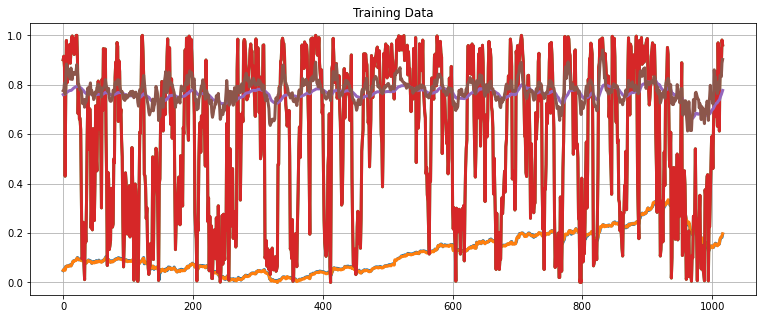

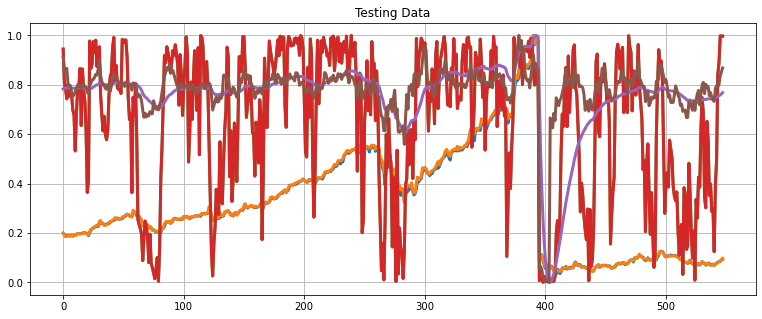

In [83]:
 pricePrediction_LR('AAPL', 1,starting_date )

In [ ]:
Linear Regression Score:  0.9421008345526952
RMSE: 0.032302983250378184
Rsquared 0.9652695638756481
MAE: 0.017008823195636763

Linear Regression Score:  0.8979947307446892
RMSE: 0.016915412952278275
Rsquared 0.9947269200822295
MAE: 0.012237360972020331


Linear Regression Score:  0.39095900263819494
RMSE: 0.044886573378705115
Rsquared 0.9631714510989251
MAE: 0.0325696824683764


Linear Regression Score:  -1.4774402621892504
RMSE: 0.07733191511561914
Rsquared 0.8875073551659809
MAE: 0.058043509489294244


Linear Regression Score:  -4.911064400902747
RMSE: 0.10586877576613271
Rsquared 0.7987291556394128
MAE: 0.08567980370718235


ValueError: Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.

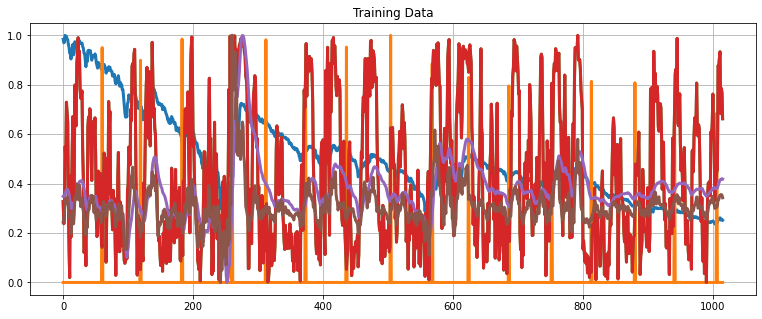

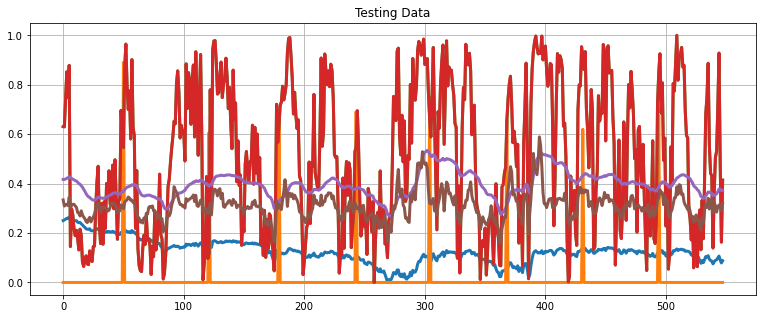

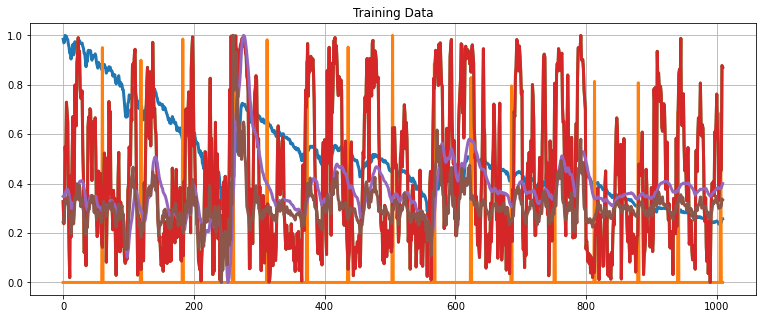

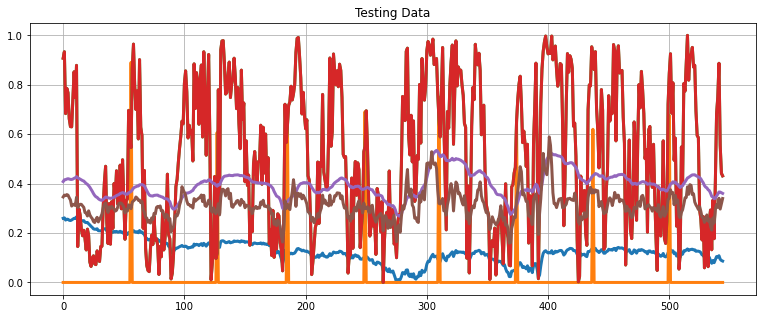

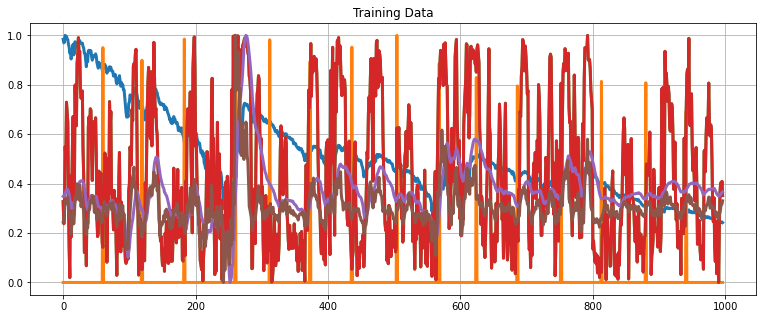

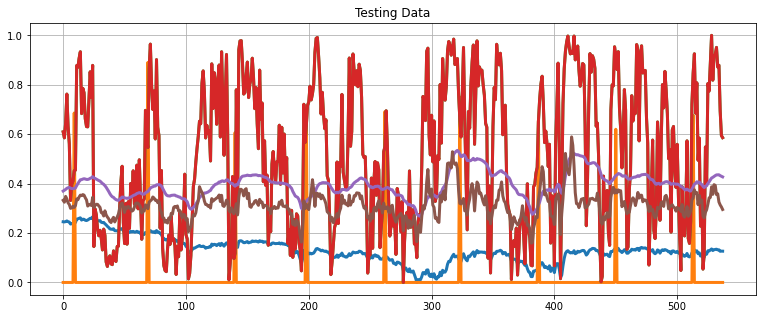

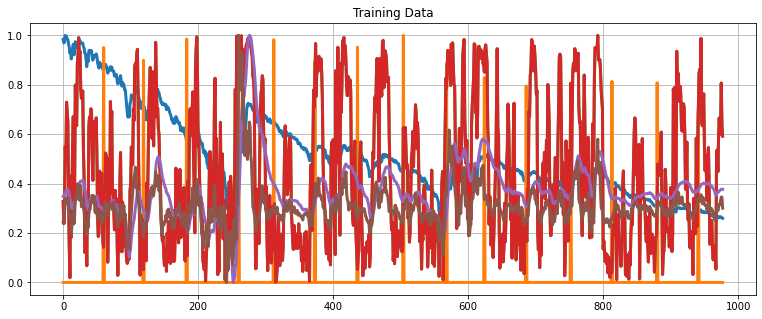

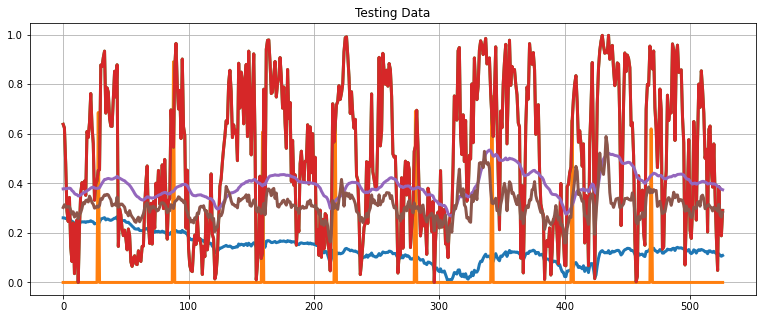

In [27]:
# volatile asset
windows = [1,10,30,60,90] 
for i in windows:
    pricePrediction_LR('VOO', i,starting_date )





In [29]:
time.sleep(60)

In [30]:
def pricePrediction_RandomForest(symbol,days, starting_date):
    
    #     obtain stock data
    stock_df= stock_data(symbol,starting_date)
    
    
    #     obtaining technical indicators
    stochastic_Oscillator(stock_df)
    calc_williams_r(stock_df)
    calc_macd(stock_df)
    calc_price_rate_of_change(stock_df)
    
    #     set the trading window we are trying to predict
    stock_df_targeted = trading_window(stock_df,days)
    
#     reset index so that date is no longer the index of the data
    stock_df_targeted.reset_index(inplace = True)
    stock_df_targeted = stock_df_targeted.dropna()
    
    stock_df_targeted_scaled= stock_df_targeted
#     drop irrelevant columns
    stock_df_targeted_scaled.drop(['Ticker','4. close','7. dividend amount','3. low', '5. adjusted close', '6. volume', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True)
    
    stock_df_targeted_scaled = sc.fit_transform(stock_df_targeted_scaled.drop(columns = ['date']))
    
#     # Creating Feature and Target
    X = stock_df_targeted_scaled[:,:6]
    y = stock_df_targeted_scaled[:,6:]
     
    split = int(0.65 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]

    show_plot(X_train, 'Training Data')
    show_plot(X_test, 'Testing Data')
    
    rf = RandomForestRegressor()
    
    rf.fit(X_train, y_train.ravel()) 
    pred_rf = rf.predict(X)
  
    print('MSE: ' +str(mean_squared_error(y, pred_rf)))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y, pred_rf))))
    print('Rsquaed: '+ str(r2_score(y, pred_rf)))
    print('MAE: ' + str(mean_absolute_error(y, pred_rf)))
    print('')
    
    
    Predicted = []
    for i in pred_rf:
        Predicted.append(i)
        
    close = []
    for i in stock_df_targeted_scaled:
        close.append(i[0])
        

    df_predicted = stock_df_targeted[['date']]
    df_predicted['Close'] = close
    df_predicted['Prediction'] = Predicted
    
    interactive_plot(df_predicted, "Original Vs. Prediction for " )
   
    

MSE: 0.005064497323708341
RMSE: 0.07116528172998643
Rsquaed: 0.9063295491640522
MAE: 0.04061457125782124



MSE: 0.007587434209540214
RMSE: 0.08710587930524676
Rsquaed: 0.8608605582485198
MAE: 0.05294293708870129



MSE: 0.008453959020301138
RMSE: 0.09194541326407282
Rsquaed: 0.8427082505105818
MAE: 0.05602069410188755



MSE: 0.008350705511350748
RMSE: 0.09138219471730118
Rsquaed: 0.8495374660245048
MAE: 0.056950560957977805



MSE: 0.009176864663127912
RMSE: 0.09579595327114769
Rsquaed: 0.8436588538357978
MAE: 0.05902623513225769



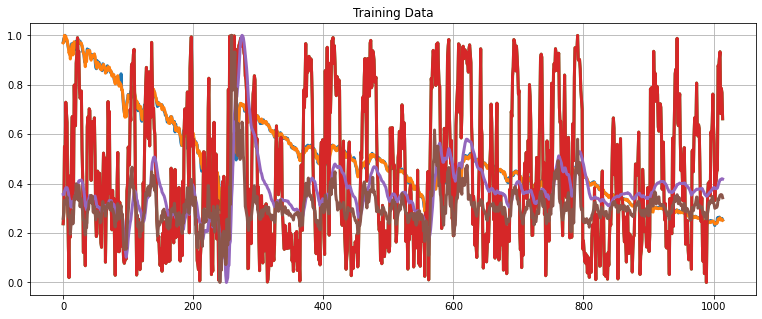

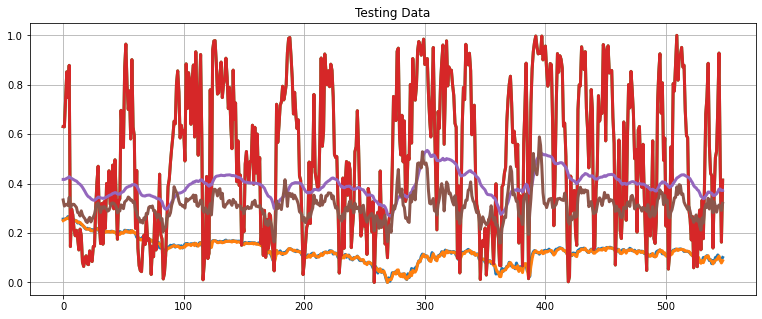

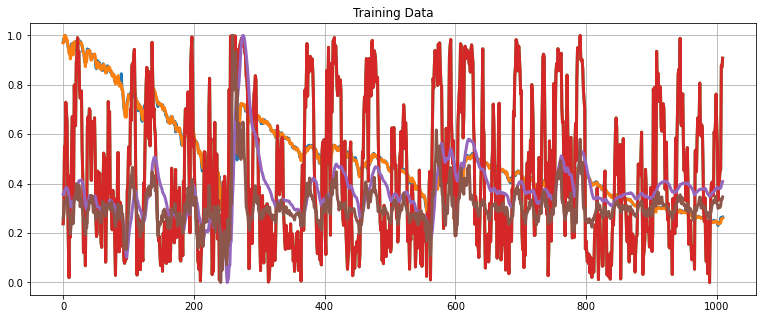

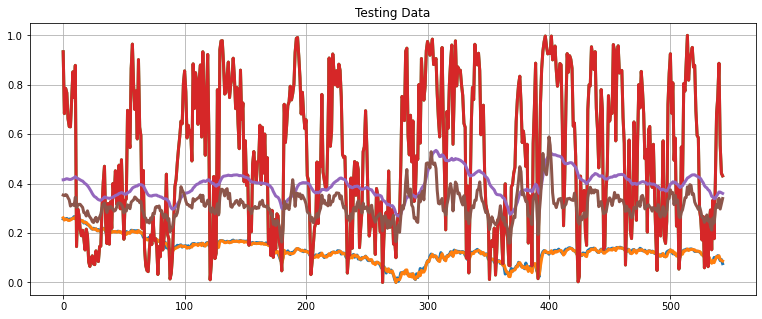

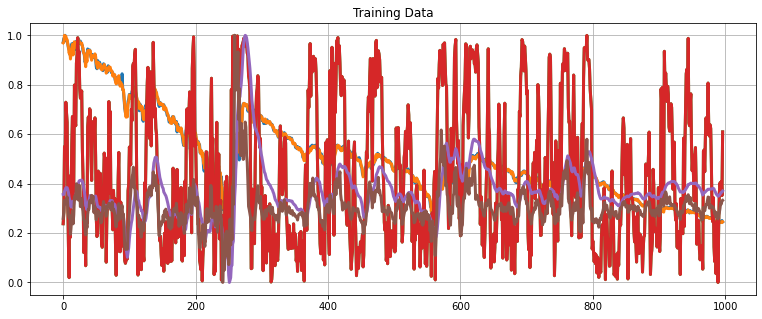

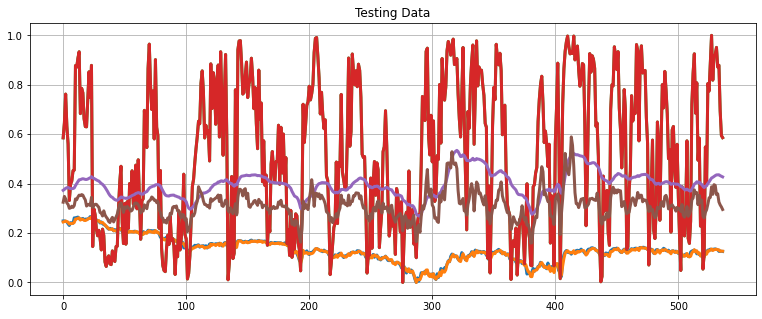

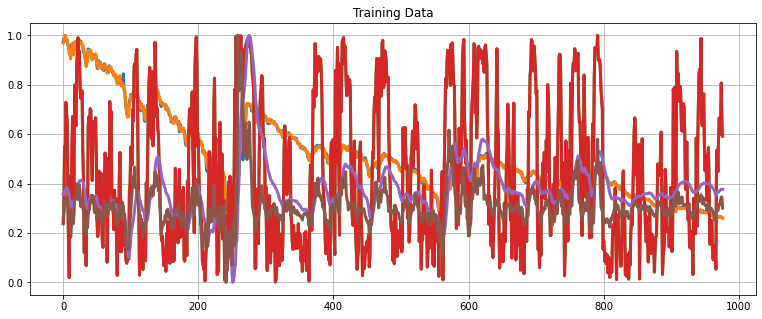

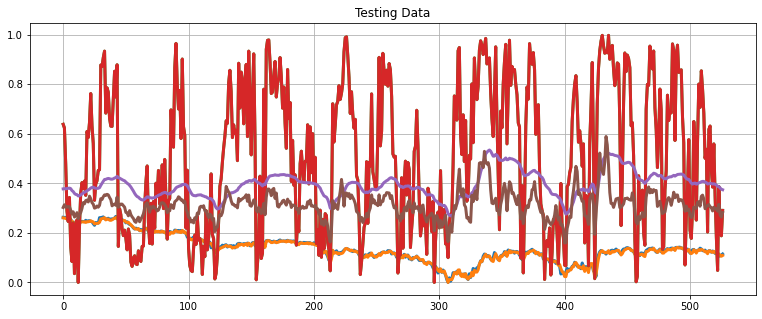

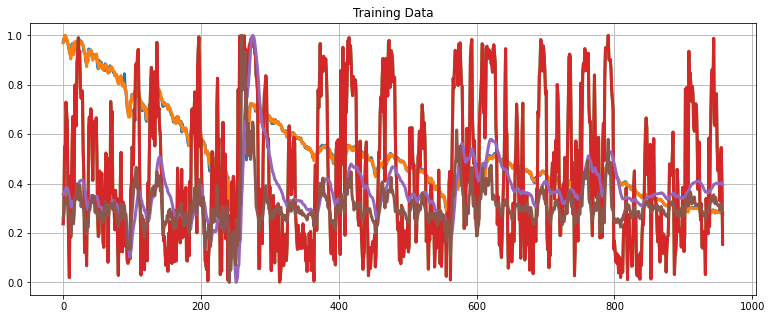

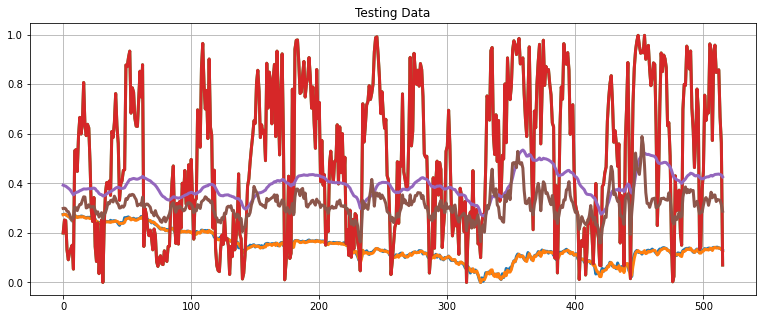

In [31]:
windows = [1,10,30,60,90]
for i in windows:
    pricePrediction_RandomForest('VOO', i,starting_date )



In [32]:
time.sleep(60)

In [73]:
def pricePrediction_LSTM(symbol,days, starting_date):
#     obtain stock data
    stock_df= stock_data(symbol,starting_date)
    
    
    #     obtaining technical indicators
    stochastic_Oscillator(stock_df)
    calc_williams_r(stock_df)
    calc_macd(stock_df)
    calc_price_rate_of_change(stock_df)
    
    stock_df.reset_index(inplace = True)
   
    #     set the trading window we are trying to predict
    stock_df_targeted = trading_window(stock_df,days)
    stock_df_targeted.drop(['Ticker','4. close','7. dividend amount','3. low', '5. adjusted close', '6. volume', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True)
    stock_df_targeted.dropna(inplace=True)
    training_data_X = stock_df_targeted.iloc[:, 1:6].values
    training_data_y = stock_df_targeted.iloc[:, 6:].values
    
    stock_df_targeted_scaled= sc.fit_transform(stock_df_targeted.drop(columns = ['date']))

    X = sc.fit_transform(training_data_X)
    y = sc.fit_transform(training_data_y)
    
    
    # Convert the data into array format
    X = np.asarray(X)
    y = np.asarray(y)
    
    # Split the data
    split = int(0.7 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]
    
    # Reshape the 1D arrays to 3D arrays to feed in the model
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    X_train.shape, X_test.shape

    # Create the model
    inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
    x = keras.layers.LSTM(150, return_sequences= True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(150, return_sequences=True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(150)(x)
    outputs = keras.layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss="mse", metrics=['mean_squared_error', 'mae'])
    model.summary()
    
    # Trai the model
    history = model.fit(
        X_train, y_train,
        epochs = 20,
        batch_size = 32,
        validation_split = 0.2
    )
    
    predicted = model.predict(X)
    
    test_predicted = []

    for i in predicted:
      test_predicted.append(i[0])
    
    close = []
    for i in stock_df_targeted_scaled:
        close.append(i[0])
        
    df_predicted = stock_df_targeted[['date']]
    df_predicted['Close'] = close
    df_predicted['Prediction'] = predicted
    
#     interactive_plot(df_predicted, "Original Vs. Prediction for " )
    scores = model.evaluate(X, y, verbose=0)
    
    print("MSE:" + str((scores[0])))
    print("MAE:" + str((scores[1])))
    print('R2 Score: ', r2_score(y, predicted))
    # Plot the data
    interactive_plot(df_predicted, "Original Vs Prediction")
    
   

In [74]:
 pricePrediction_LSTM('VOO', 1,starting_date )

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 5, 150)            91200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 150)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 5, 150)            180600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 150)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151 

In [35]:
windows = [1,10,30,60,90]
for i in windows:
    pricePrediction_LSTM('VOO', i,starting_date )



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 150)            91200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 150)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 150)            180600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 150)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151 

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 5, 150)            91200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 150)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 5, 150)            180600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 150)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151 

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 5, 150)            91200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 150)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 5, 150)            180600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 150)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151 

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 5, 150)            91200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 150)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 5, 150)            180600    
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 150)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151 

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 5, 150)            91200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 150)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 5, 150)            180600    
_________________________________________________________________
dropout_11 (Dropout)         (None, 5, 150)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 151 